# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
    - Predicting the value of Y using the value of X.
- What type of machine learning is linear regression? 
    - Supervised Machine Learning
- What is a “line of best fit” using the OLS method?
    - A straight line that best depicts the relationship between two variables.
- What is the difference between correlation and regression?
    - Correlation is the degree of the relationship between two variables. How insync are the two variables.  Regression is about causation and how one variable is affected by another.
- Describe a scenario when you would use linear regression and why you would use it. 
    - Sugar you consume and chances of getting diabeties. The more sugar you consume on a daily basis the more likely you are to get diabetes.

### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity - Y the dependent variable should relate to other variables linearly
- Normality - X and Y variables have a normal distribution when checking histograms, KDE plots, and Q-Q plots
- Homoscedasticity - how the residuals are spread out should form a funnel shape or be constant
- No multicollinearity - There should be no correlation between variables that are independent. We can use a correlation matrix to check the correlation.
- No endogeneity - Endogeneity is when there is correlation between the independent variable and error term 
- No autocorrelation - Error terms must be independent of one another. Can be tested using Durbin Watson test.

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0) - Is a constant intercept of the regression line with the y-axis 
- Coefficient of Independent Variable (B1) - Is the slope of the line shows how much y change for each change in x
- Standard Error - Standard deviation of variable's coefficient across all data points
- T-Statistic - used with the P-Value to determine the significance of the p-value, used with smaller sample sizes
- P-Value of T-Statistic (from the independent variable) - how often your data would occur by random chance


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared - how close each data point is to the line of best fit or how well it predicts values
- Adjusted R-squared - penelizes excessive use of variables

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
# make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
# load data
df = pd.read_csv("house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800


### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [3]:
# explore data below (you will need to make new cells)
#sns.pairplot(df);

In [4]:
#smaller pair plot
df = df[['price', 'sqft_living', 'sqft_lot', 'year_built', 'house_condition', 'grade', 'view']].copy()

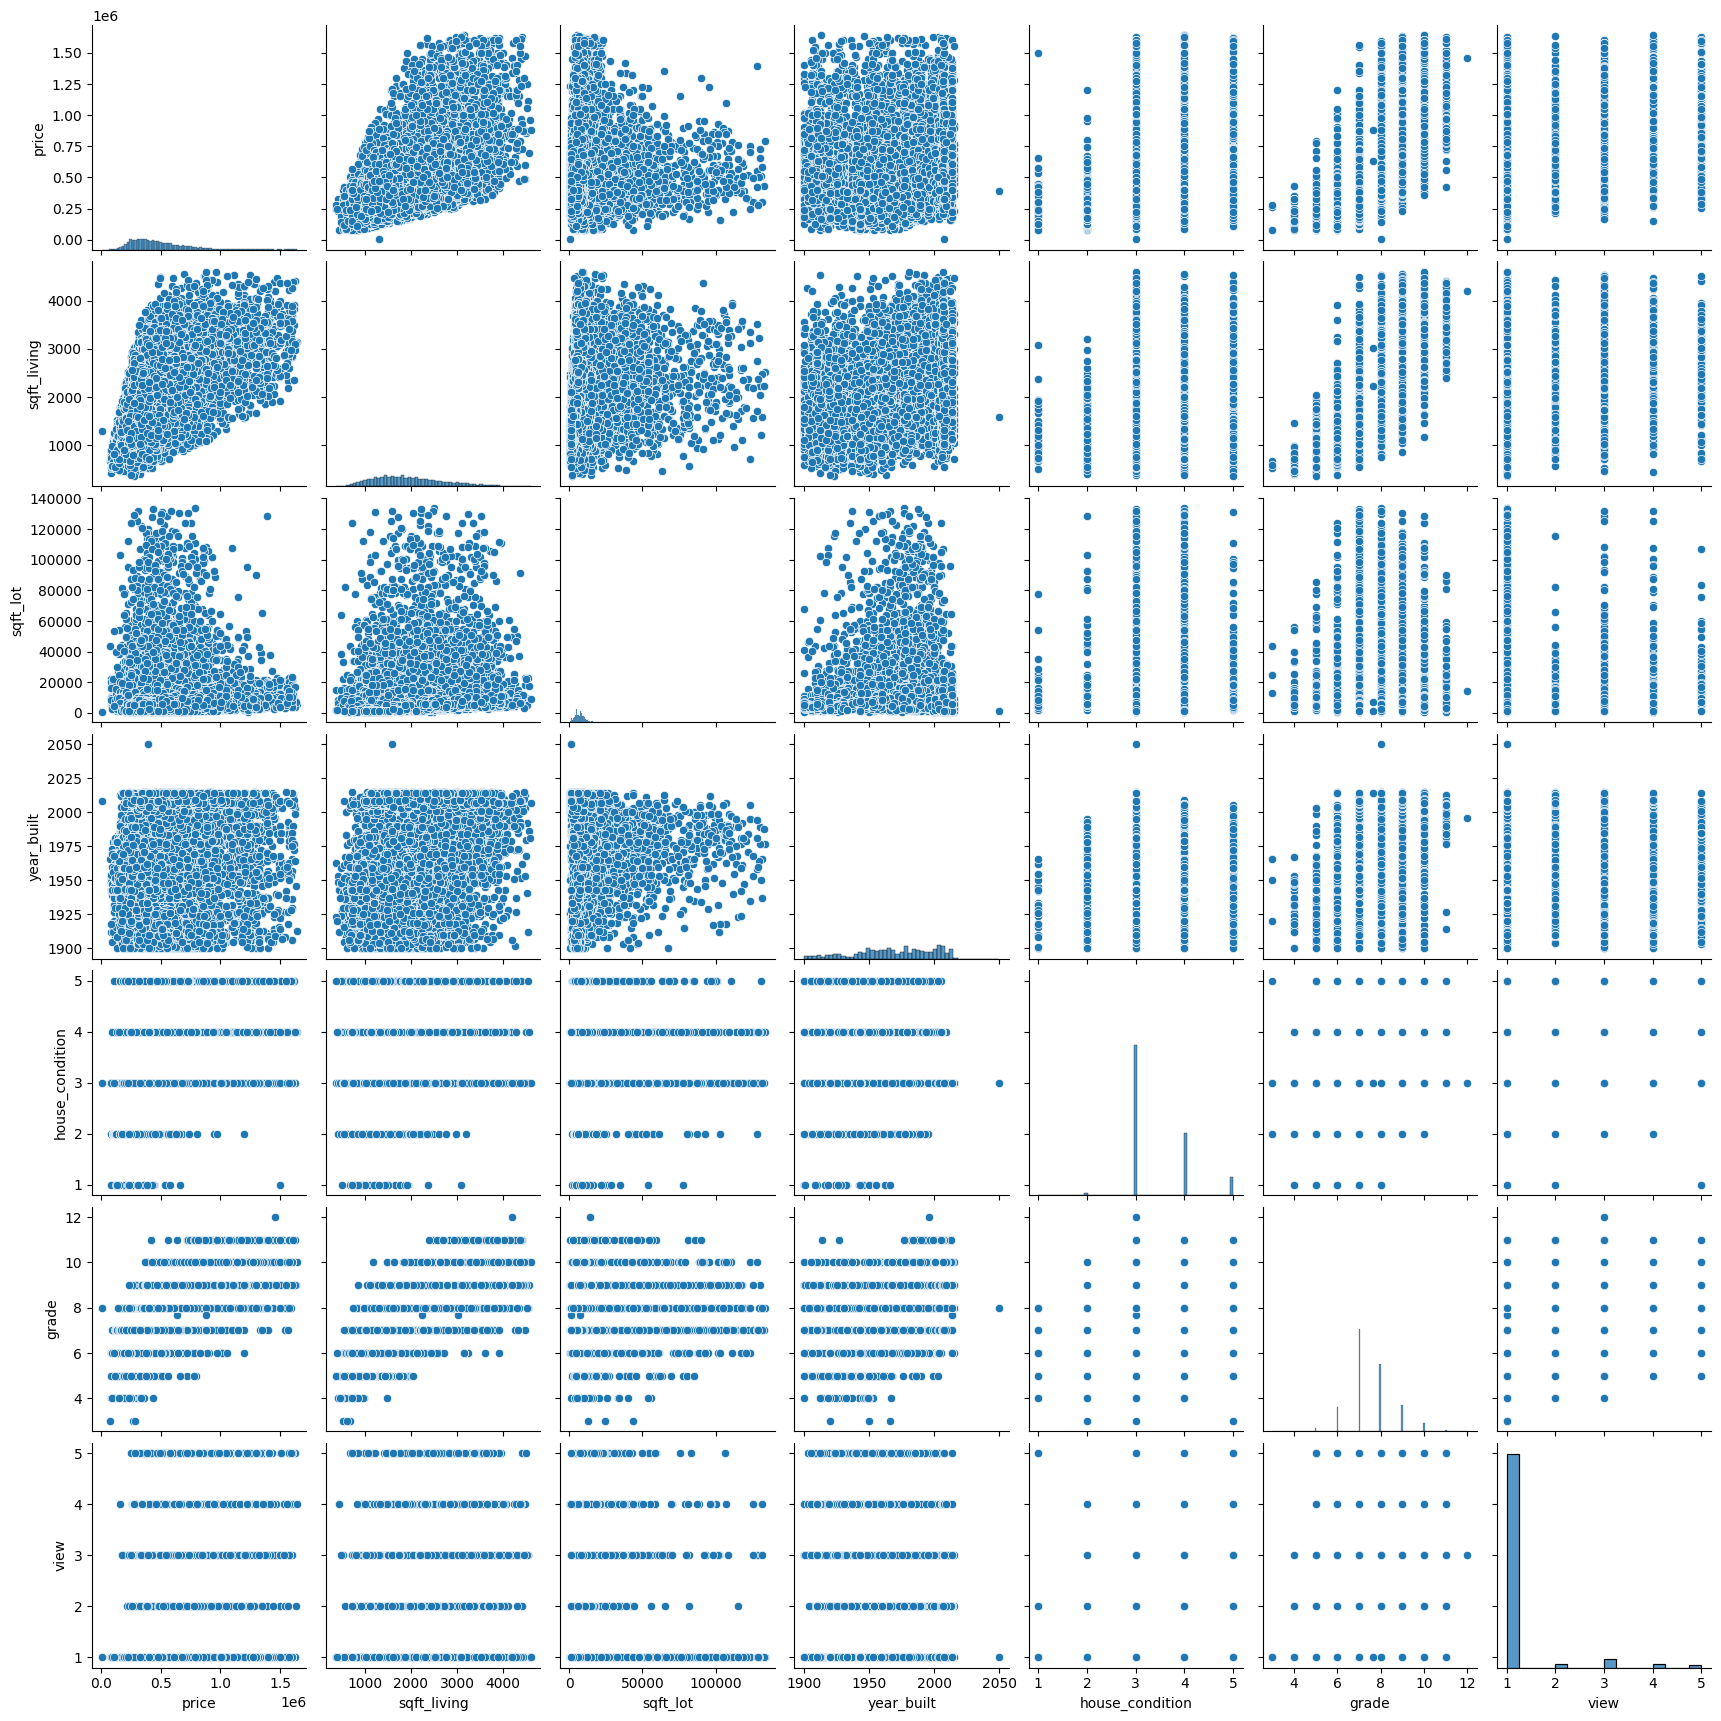

In [5]:
sns.pairplot(df)

In [6]:
df.head()

,price,sqft_living,sqft_lot,year_built,house_condition,grade,view
0,221900.0,1180,5650.0,1955.0,3,7.0,1
1,538000.0,2570,7242.0,1951.0,3,7.0,1
2,180000.0,770,10000.0,1933.0,3,6.0,1
3,604000.0,1960,5000.0,1965.0,5,7.0,1
4,510000.0,1680,8080.0,1987.0,3,8.0,1


<Axes: >

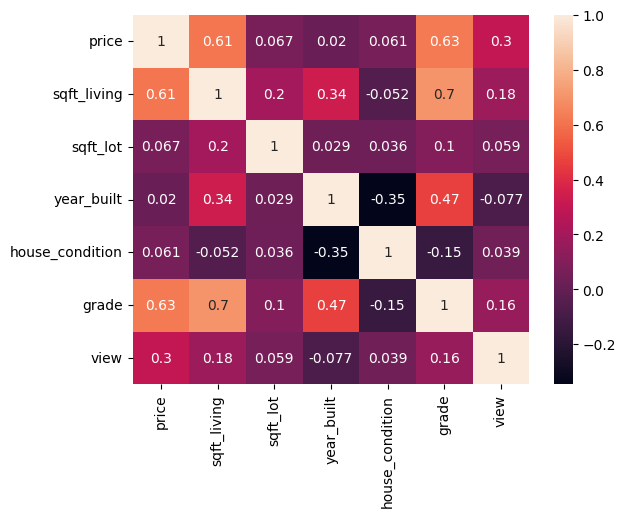

In [7]:
sns.heatmap(df.corr(), annot = True)

### Step 3: Determine independent and dependent variable

In [8]:
# sets X to sqft_living

x = df['sqft_living']

# sets Y to price

y = df['price']

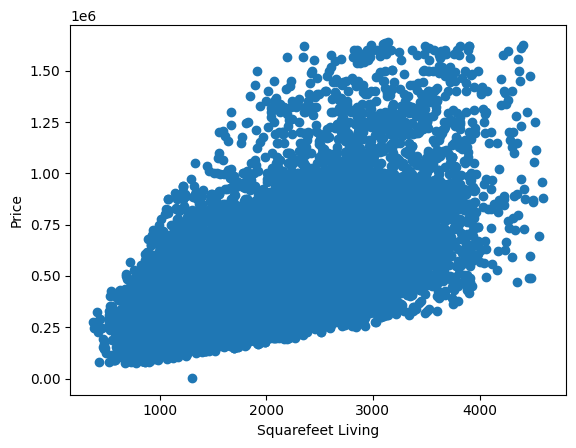

In [9]:
# visualize relationship between X and Y
plt.scatter(x, y)
plt.xlabel('Squarefeet Living')
plt.ylabel('Price');

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [10]:
# fit model to X and Y variables (you will need to make more cells)

### Step 5: Interpret Model Summary 

In [11]:
# print out and interpret model summary // terms identified below
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:12:01   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpret the following from your model:

- R-squared = 0.376 38 percent accurate
- Coefficient of independent variable = 202.9975 sqft increases by 203 for every single unit increase of price
- P-value of T-statistic 0.00 We reject the null hypothesis as this is lower than 0.05
- P-value of F-statistic 0.00 P-value can only tell you whether or not the null hypothesis is supported

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [12]:
# predict new y values (dependent variables) by feeding model new independent variable values

new_df = pd.DataFrame({'constant':1, 'sqft_living':[1100, 1500]})
new_df

,constant,sqft_living
0,1,1100
1,1,1500


In [13]:
predictions = results.predict(new_df)
predictions

0    315404.008401
1    396595.022459
dtype: float64

In [14]:
new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,sqft_living,price_predictions
0,1,1100,315404.008401
1,1,1500,396595.022459


# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [15]:
# Pick another independent variable. Be sure to avoid multicollinearity. 

# The grade variable is best to add as it avoids multicollinearity and has a decent range of numbers

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [16]:
# fit new regression model (you will need to make more cells)

y = df['price']
x1 = df[['sqft_living', 'grade']]

In [17]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8419.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:12:01   Log-Likelihood:            -2.7629e+05
No. Observations:               20456   AIC:                         5.526e+05
Df Residuals:                   20453   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.116e+05   1.01e+04    -40.665      0.000   -4.31e+05   -3.92e+05
sqft_living   113.2243      2.407     47.049      0.000     108.507     117.941
grade        9.023e+04   1697.513     53.153      0.000    8.69e+04    9.36e+04
==============================================================================
Omnibus:                     4053.224   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9767.719
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared = 0.452
- Adjusted R-squared = 0.451
- Coefficient of independent variables = 113.2243, 9.023e+04
- P-value of T-statistic = 0.00 We reject the null hypothesis as this is lower than 0.05
- P-value of F-statistic = 0.00 P-value can only tell you whether or not the null hypothesis is supported

If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [23]:
# predict new y values (dependent variables) by feeding model new independent variable values
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1200, 1200, 1200, 1200], 'grade':[6,6,8,8]})
new_df

,constant,sqft_living,grade
0,1,1200,6
1,1,1200,6
2,1,1200,8
3,1,1200,8


In [24]:
new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,sqft_living,grade,price_predictions
0,1,1200,6,265681.760632
1,1,1200,6,265681.760632
2,1,1200,8,446138.800920
3,1,1200,8,446138.800920


### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [ ]:
# create new markdown cell and write down your observations

They are very similar but, one is like a more complex version of the other. The multiple linear regression model is used to the see the relationship between multiple independent variables and one dependent variable.

# Part 4 - Multivariate Time Series Analysis

In [ ]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 